In [12]:
%run ./DataGen2.ipynb

plt.rcParams.update({'font.size': 14})

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [102]:
ID = 1

In [14]:
folders = {1: 'standard',
          2: 'low_density',
          3: 'high_noise',
          4: 'different_densities',
          5: 'different_sizes',
          6: 'non_uniform_noise'}

NumberOfSimulations = 30
general_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/'
figures_saving_path = general_path + 'Results/Figures/'

In [97]:
suptitles = {1: 'Standard',
          2: 'Low density clusters',
          3: 'High level of noise',
          4: 'Different densities clusters',
          5: 'Different sizes clusters',
          6: 'Non uniform background '}

In [15]:
def read_GT():
    path = general_path + 'Data/' + folders[ID] + '/'
    truelabels = []
    for i in range(NumberOfSimulations):
        truelab = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv',
                       usecols = ['labels_1'])['labels_1'].to_numpy()
        truelabels.append(truelab)
    return truelabels

def read_graphic():
    path = general_path + 'Graphic_analysis/'
    graphic_labels = []
    for i in range(NumberOfSimulations):
        graphic_lab = pd.read_csv(path + 'graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['graphic_label'])['graphic_label'].to_numpy()
        graphic_labels.append(graphic_lab)
    return graphic_labels

def read_tomato():
    path = general_path + 'Tomato_analysis/'
    tomato_labels = []
    for i in range(NumberOfSimulations):
        tomato_lab = pd.read_csv(path + 'tomato_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['x'])['x'].to_numpy()
        tomato_labels.append(tomato_lab)
    return tomato_labels

def read_voronoi():
    path = general_path + 'SRT_analysis/'
    voronoi_labels = []
    for i in range(NumberOfSimulations):
        voronoi_lab = pd.read_csv(path + 'voronoi_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['x'])['x'].to_numpy()
        voronoi_clean = remove_small_clusters(voronoi_lab, 5)
        voronoi_labels.append(voronoi_clean)
    return voronoi_labels

In [17]:
def compute_FMIs(GT, res):
    FMIs = []
    for i in range(NumberOfSimulations):
        FMI = metrics.fowlkes_mallows_score(GT[i], res[i])
        FMIs.append(FMI)
    return FMIs

def compute_and_plot_all_FMIs(title = ''):
    global ID, truelabels, graphic_labels, tomato_labels, voronoi_labels, figures_saving_path
    
    FMI_graphic = compute_FMIs(truelabels, graphic_labels)
    FMI_voronoi = compute_FMIs(truelabels, voronoi_labels)
    FMI_tomato = compute_FMIs(truelabels, tomato_labels)
    
    plt.figure(figsize = (4,4))
    plt.boxplot([FMI_graphic, FMI_tomato, FMI_voronoi], labels = ['GrapHiC', 'ToMATo', 'Voronoi'],
                medianprops=dict(linewidth=1.5), boxprops = dict(linewidth=1.5))
    plt.grid()
    plt.ylabel('FMI')
    plt.title(title)
    plt.savefig(figures_saving_path + 'FMI_' + str(ID) + '.pdf')


                                
#notch=True, patch_artist=True,
#boxprops=dict(facecolor=c, color=c),
#capprops=dict(color=c),
#whiskerprops=dict(color=c),
#flierprops=dict(color=c, markeredgecolor=c),
#medianprops=dict(color='DarkOrange'))
    

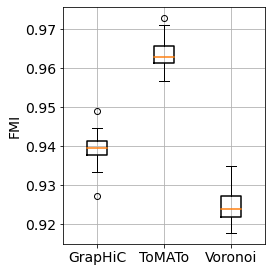

In [246]:
compute_and_plot_all_FMIs()

In [267]:
def histo_NumberOfClusters(list_of_labels,  method_str, GT = 40):
    global ID, figures_saving_path
    N_clusters = []
    for labels in list_of_labels:
        NumberOfClusters = len(np.unique(labels))-1
        N_clusters.append(NumberOfClusters)
    plt.figure(figsize = (4,4))
    #plt.axvspan(18, 24, color='DarkOrange', alpha = 0.2, label = 'domaine ok selon GT')
    #plt.hist(N_clusters, bins = np.unique(N_clusters), color = 'tab:purple')
    unique, counts = np.unique(N_clusters, return_counts = True)
    plt.bar(unique, counts, align = 'center', color = 'tab:purple')
    plt.grid()
    plt.axvline(x=GT, label='GT : ' + str(GT), c='DarkOrange', linewidth=2, linestyle = '--')
    plt.legend()
    plt.xlabel('#clusters detected')
    plt.ylabel('#datasets')
    plt.xlim(24, 55)
    ymax = max(counts) * 1.5
    plt.ylim(0, ymax)
    plt.savefig(figures_saving_path + 'NumberOfClusters_'+ method_str + str(ID) +  '.pdf')
        

def histo_LocPerCluster(list_of_labels, method_str, GT = 24):
    global ID, figures_saving_path
    plt.figure(figsize = (4,4))
    plt.axvline(x=GT, label='GT : ' + str(GT), c='tab:pink', linewidth=2,linestyle = '--')
    #plt.axvspan(10, 40, color='tab:pink', alpha = 0.2, label = 'GT : 10 to 40')
    #plt.axvline(x=18, c='tab:blue', linewidth=0.5, linestyle = '--')
    #plt.axvline(x=24, c='tab:blue', linewidth=0.5, linestyle = '--')
    for labels in list_of_labels:
        unique, counts = np.unique(labels, return_counts = True)
        counts_without_noise = counts[np.where(unique != 0)]
        unique_for_bar, counts_for_bar = np.unique(counts_without_noise, return_counts = True)
        plt.bar(unique_for_bar, counts_for_bar, align = 'center', color = 'tab:olive')
    
    plt.grid()
    plt.legend()
    plt.xlabel('#points attr. to the cluster')
    plt.ylabel('#clusters')
    #plt.ylim(0, 17.1)
    #plt.xlim(0, 150)
    #plt.xticks([15, 18, 21, 24])
    #plt.yticks([0, 20, 40, 60])
    plt.savefig(figures_saving_path + 'LocPerCluster_'+ method_str + str(ID) +  '.pdf')

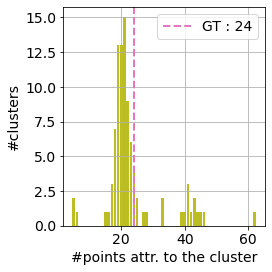

In [268]:
histo_LocPerCluster(graphic_labels, 'graphic', GT = 24)

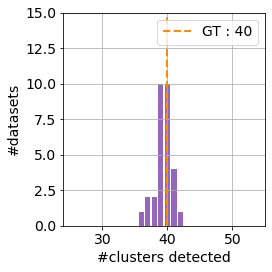

In [269]:
histo_NumberOfClusters(graphic_labels, 'graphic')

In [ ]:
unique, counts = np.unique(labels_clean, return_counts = True)
counts_without_noise = counts[np.where(unique != 0)]

In [148]:
def subfigure_LocPerCluster(ax, list_of_labels, title, show_ylabel = False):
    ax.set_title(title)
    ax.grid()
    ax.axvline(x= GT, label='GT : ' + str(GT) , c='tab:pink', linewidth=2,linestyle = '--')
    #ax.axvspan(14, 124, color='tab:pink', alpha = 0.2, label = 'GT : 14 to 124')
    for labels in list_of_labels:
        unique, counts = np.unique(labels, return_counts = True)
        counts_without_noise = counts[np.where(unique != 0)]
        unique_for_bar, counts_for_bar = np.unique(counts_without_noise, return_counts = True)
        ax.bar(unique_for_bar, counts_for_bar, align = 'center', color = 'tab:olive')
        ax.legend()
        ax.set(xlabel ='#points/cluster')
        if show_ylabel: ax.set(ylabel ='#clusters')
    ax.set_box_aspect(1)

def subfigure_NumberOfClusters(ax, list_of_labels, title, show_ylabel = False):
    ax.grid()
    ax.set_title(title)
    N_clusters = []
    for labels in list_of_labels:
        NumberOfClusters = len(np.unique(labels))-1
        N_clusters.append(NumberOfClusters)
    unique, counts = np.unique(N_clusters, return_counts = True)
    ax.bar(unique, counts, align = 'center', color = 'tab:purple')
    ax.axvline(x=40, label='GT : ' + str(40), c='DarkOrange', linewidth=2, linestyle = '--')
    ax.legend()
    ax.set(xlabel ='#clusters detected')
    if show_ylabel: ax.set(ylabel ='#datasets')
    ax.set_xlim([25, 55])
    ymax = max(counts) * 1.5
    ax.set_ylim([0, ymax])
    ax.set_box_aspect(1)

In [149]:
def subfigure_point_cloud(ax):
    reading_path = general_path + 'Data/' + folders[ID] + '/'
    filename = 'simulated_SMLM_' + str(ID) + '_2.csv'
    figures_saving_path = general_path + 'Results/Figures/'
    data = pd.read_csv(reading_path + filename)
    data = modify_cov_matrix_format(data)

    P              = data[['x','y']].to_numpy()
    labels         = data['labels_1'].to_numpy()

    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)

    ax.scatter(P[noise_idx,0], P[noise_idx,1], c = 'tab:blue', s = 0.01)
    #plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
    ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.01)
    #ax.gca().set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('input point-cloud ex.')
    ax.set_box_aspect(1)
    
def subfigure_FMI(ax):
    global ID, truelabels, graphic_labels, tomato_labels, voronoi_labels, figures_saving_path
    
    FMI_graphic = compute_FMIs(truelabels, graphic_labels)
    FMI_voronoi = compute_FMIs(truelabels, voronoi_labels)
    FMI_tomato = compute_FMIs(truelabels, tomato_labels)
    ax.grid()
    ax.boxplot([FMI_graphic, FMI_tomato, FMI_voronoi], labels = ['GrapHiC', 'ToMATo', 'Voronoi'],
                medianprops=dict(linewidth=1.5), boxprops = dict(linewidth=1.5))

    ax.set(ylabel ='FMI')
    ax.axhline(y=1.0, c='lightgray', linewidth=0.5, linestyle = '--')
    ax.set_title('FMI results for each algo.')
    ax.set_box_aspect(1)
    

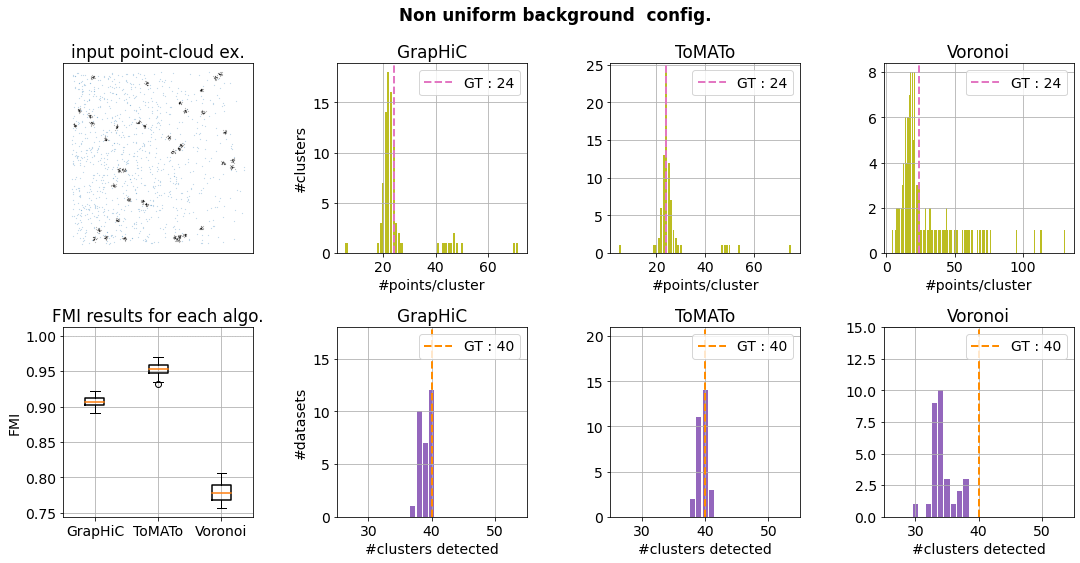

In [150]:
ID = 6
voronoi_labels = read_voronoi()
tomato_labels = read_tomato()
graphic_labels = read_graphic()
truelabels = read_GT()


fig, axs = plt.subplots(2, 4, figsize = (16,8))

pc, fmi, g1, t1, v1, g2, t2, v2 = axs[0,0], axs[1,0], axs[0,1], axs[0,2], axs[0,3], axs[1,1], axs[1,2], axs[1,3]

GT = 24
plt.suptitle(suptitles[ID] + ' config.', fontweight="bold")
subfigure_LocPerCluster(g1, graphic_labels, 'GrapHiC', True)
subfigure_LocPerCluster(t1, tomato_labels, 'ToMATo')
subfigure_LocPerCluster(v1, voronoi_labels, 'Voronoi')
subfigure_NumberOfClusters(g2, graphic_labels,'GrapHiC', True)
subfigure_NumberOfClusters(t2, tomato_labels, 'ToMATo')
subfigure_NumberOfClusters(v2, voronoi_labels, 'Voronoi')
subfigure_point_cloud(pc)
subfigure_FMI(fmi)

plt.savefig(figures_saving_path + folders[ID] +  '.png')




In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (4,8))

pc, fmi = axs[0], axs[1]

GT = 24

subfigure_point_cloud(pc)
subfigure_FMI(fmi)



In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (12,8))

g1, t1, v1, g2, t2, v2 = axs[0,0], axs[0,1], axs[0,2], axs[1,0], axs[1,1], axs[1,2]

GT = 24

subfigure_LocPerCluster(g1, graphic_labels, 'GrapHiC', True)
subfigure_LocPerCluster(t1, tomato_labels, 'ToMATo')
subfigure_LocPerCluster(v1, voronoi_labels, 'Voronoi')
subfigure_NumberOfClusters(g2, graphic_labels,'GrapHiC', True)
subfigure_NumberOfClusters(t2, tomato_labels, 'ToMATo')
subfigure_NumberOfClusters(v2, voronoi_labels, 'Voronoi')


